### Mopsy and Mocha ####

#### Introduction ###
Here in this machine learning project, we will be using the concept of convolutional linear regression, where we will be interaction a set of images, some with a dog and others with a cat. The data set has already been divided into a testing and training set, where we will begin to train a model to identify cats, dogs, and the differences between them.


Below is some code that allows for the importing of all images as a Numpy array, for which the skimage library was used. First, all related libraries were imported.

In [1]:
import sys, os
import skimage.io, skimage.color
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

This function returns the shape of an image, given a folder path and a filename. This is returned as a Numpy array.

In [2]:
def get_image_resolution(folder, file):
    full_path = os.path.join(folder, file)
    img_data = skimage.io.imread(full_path)
    bw_data = skimage.color.rgb2gray(img_data)
    return bw_data.shape

As a proof of concept to show that pictures could be read, all training dog pictures were opened into a Numpy array, where the `get_image_resolution()` function extracted the shape as long as the image is opened. Only one folder is needed for this proof of concept.

In [3]:
# First, we need to get every single file.
training_dog_folder = "training_set/dogs"
test_dog_folder = "test_set/dogs"

training_dog_paths = os.listdir(training_dog_folder)
training_dog_resolutions = [get_image_resolution(training_dog_folder, i) for i in training_dog_paths]

print(training_dog_resolutions)

[(499, 327), (292, 269), (397, 500), (375, 499), (500, 347), (199, 200), (166, 220), (333, 235), (355, 500), (500, 499), (241, 323), (332, 500), (479, 500), (500, 440), (269, 360), (199, 300), (106, 160), (299, 217), (429, 499), (500, 320), (335, 275), (298, 194), (374, 500), (318, 349), (373, 499), (401, 426), (499, 390), (189, 199), (150, 199), (368, 432), (500, 424), (261, 350), (500, 332), (99, 100), (217, 249), (433, 499), (375, 499), (375, 499), (332, 499), (375, 304), (490, 363), (497, 500), (479, 412), (335, 448), (375, 499), (499, 479), (375, 499), (375, 499), (465, 500), (375, 499), (116, 200), (374, 500), (500, 379), (375, 499), (499, 236), (374, 500), (400, 270), (221, 170), (402, 394), (328, 500), (488, 500), (155, 200), (288, 299), (375, 499), (500, 321), (499, 375), (375, 499), (179, 135), (374, 500), (500, 405), (374, 500), (447, 336), (290, 349), (344, 499), (334, 445), (500, 374), (496, 400), (345, 250), (500, 341), (458, 499), (465, 399), (375, 499), (417, 350), (375

With these resolutions, next week, the resolutions will be filtered using a histogram, so comparisons can only be made between similarly sized pictures. Since reading these resolutions requires getting the shape of each Numpy array of pixels, it indicates that every image file in a folder of pictures was opened.

Our progress is available at https://github.com/andy64734/all-might.

In [4]:
HORIZ_INDEX = 0
VERT_INDEX = 1

horiz_reses = pd.Series([i[HORIZ_INDEX] for i in training_dog_resolutions])
vert_reses = pd.Series([i[VERT_INDEX] for i in training_dog_resolutions])
print(horiz_reses.mode())
print(vert_reses.mode())

0    374
dtype: int64
0    500
dtype: int64


In [5]:
"""
plt.hist2d(horiz_reses,vert_reses,bins=40)
plt.colorbar()
plt.show()
"""

'\nplt.hist2d(horiz_reses,vert_reses,bins=40)\nplt.colorbar()\nplt.show()\n'

C:\Users\sharana\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


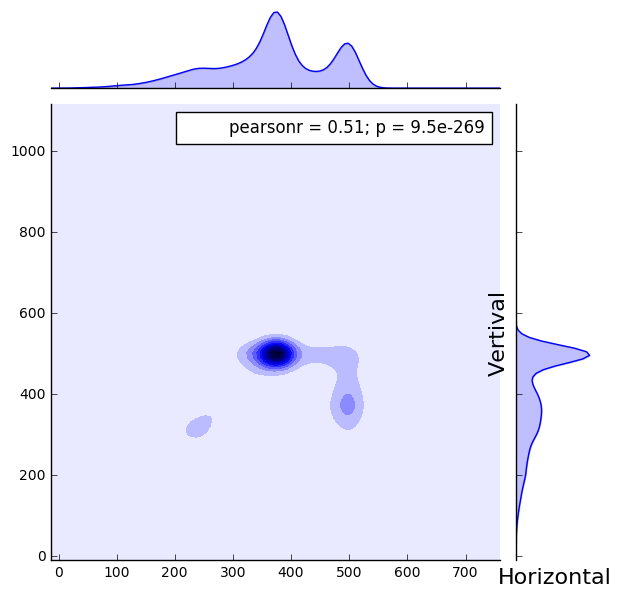

In [6]:
%matplotlib inline
sns.jointplot(np.array(horiz_reses), np.array(vert_reses), kind="kde")
plt.xlabel("Horizontal", fontsize=16)
plt.ylabel("Vertival", fontsize=16)

In [7]:
"""
Generates a Pandas DataFrame, corresponding all the paths and resolutions
into appropriate columns.
"""
def generate_df(paths, reses):
    horiz = [i[0] for i in reses]
    vert = [i[1] for i in reses]
    
    df = pd.DataFrame({'path': paths, 'horiz': horiz, 'vert': vert })    
    return df

In [8]:
training_dog_df = generate_df(training_dog_paths, training_dog_resolutions)
print(training_dog_df)

      horiz          path  vert
0       499     dog.1.jpg   327
1       292    dog.10.jpg   269
2       397   dog.100.jpg   500
3       375  dog.1000.jpg   499
4       500  dog.1001.jpg   347
5       199  dog.1002.jpg   200
6       166  dog.1003.jpg   220
7       333  dog.1004.jpg   235
8       355  dog.1005.jpg   500
9       500  dog.1006.jpg   499
10      241  dog.1007.jpg   323
11      332  dog.1008.jpg   500
12      479  dog.1009.jpg   500
13      500   dog.101.jpg   440
14      269  dog.1010.jpg   360
15      199  dog.1011.jpg   300
16      106  dog.1012.jpg   160
17      299  dog.1013.jpg   217
18      429  dog.1014.jpg   499
19      500  dog.1015.jpg   320
20      335  dog.1016.jpg   275
21      298  dog.1017.jpg   194
22      374  dog.1018.jpg   500
23      318  dog.1019.jpg   349
24      373   dog.102.jpg   499
25      401  dog.1020.jpg   426
26      499  dog.1021.jpg   390
27      189  dog.1022.jpg   199
28      150  dog.1023.jpg   199
29      368  dog.1024.jpg   432
...     

C:\Users\sharana\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


{'axes.axisbelow': True,
 'axes.edgecolor': 'white',
 'axes.facecolor': '#EAEAF2',
 'axes.grid': True,
 'axes.labelcolor': '.15',
 'axes.linewidth': 0,
 'figure.facecolor': 'white',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'grid.color': 'white',
 'grid.linestyle': '-',
 'image.cmap': 'rocket',
 'legend.frameon': False,
 'legend.numpoints': 1,
 'legend.scatterpoints': 1,
 'lines.solid_capstyle': 'round',
 'text.color': '.15',
 'xtick.color': '.15',
 'xtick.direction': 'out',
 'xtick.major.size': 0,
 'xtick.minor.size': 0,
 'ytick.color': '.15',
 'ytick.direction': 'out',
 'ytick.major.size': 0,
 'ytick.minor.size': 0}

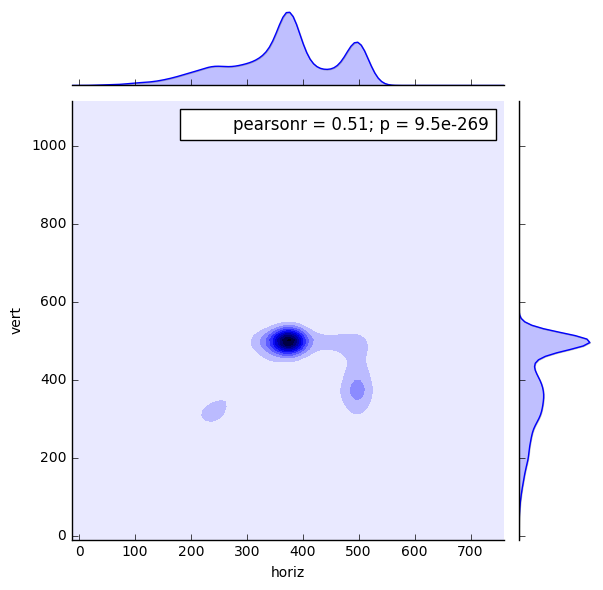

In [9]:
sns.jointplot(training_dog_df['horiz'], training_dog_df['vert'], kind="kde")
sns.axes_style("darkgrid")

In [10]:
print(training_dog_df['horiz'].median())
print(training_dog_df['horiz'].mode())
print()
print(training_dog_df['vert'].median())
print(training_dog_df['vert'].mode())

374.0
0    374
dtype: int64

421.0
0    500
dtype: int64


In [11]:
def filter_df_by_res(df, horiz, vert):
    df = df[df['horiz'] == horiz]
    df = df[df['vert'] == vert]
    return df

In [12]:
notched = filter_df_by_res(training_dog_df, 374, 500)

In [13]:
notched.shape

(450, 3)

In [14]:
test_dog_paths = os.listdir(test_dog_folder)
test_dog_resolutions = [get_image_resolution(test_dog_folder, i) for i in test_dog_paths]

In [15]:
HORIZ_INDEX = 0
VERT_INDEX = 1

horiz_reses = pd.Series([i[HORIZ_INDEX] for i in test_dog_resolutions])
vert_reses = pd.Series([i[VERT_INDEX] for i in test_dog_resolutions])
print(horiz_reses.mode())
print(vert_reses.mode())

0    374
dtype: int64
0    500
dtype: int64


In [16]:
test_dog_df = generate_df(test_dog_paths, test_dog_resolutions)

In [17]:
test_dog_df = filter_df_by_res(test_dog_df, 374, 500)

In [18]:
test_dog_df.shape

(108, 3)

In [19]:
for file in training_dog_df['path']:
    img = skimage.io.imread(os.path.join(training_dog_folder, file), as_gray = True)
    img_squished = img.flatten()